In [1]:
# sentiment analysis 

In [2]:
import pandas as pd

In [3]:
col_name = ['sentence', 'label']

In [4]:
df_yelp = pd.read_csv('/projectnb/lx796/materials/sentisent/yelp_labelled.txt', names=col_name, sep="\t")



In [5]:
df_yelp

,sentence,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [6]:
# to look at the 30th review
print(df_yelp.iloc[29])

sentence    The worst was the salmon sashimi.
label                                       0
Name: 29, dtype: object


In [7]:
from sklearn.model_selection import train_test_split

/share/pkg.7/python3/3.8.10/install/lib/python3.8/site-packages/scipy-1.6.2-py3.8-linux-x86_64.egg/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [8]:
# pull out the sentences and labels alone
yelp_sentences = df_yelp['sentence'].values
yelp_labels = df_yelp['label'].values

In [9]:
# parallel assignment
x, y = 12, 15

In [10]:
print(x)
print(y)

12
15


In [11]:
yelp_train, yelp_test, yelp_train_labels, yelp_test_labels = train_test_split(
    yelp_sentences, yelp_labels,
    test_size = .25, 
    random_state = 1000
)

In [12]:
print("Yelp training size:", len(yelp_train))
print("Yelp testing size:", len(yelp_test))
print("Third training sentence:", yelp_train[2], "-- label:", yelp_train_labels[2])

Yelp training size: 750
Yelp testing size: 250
Third training sentence: Of all the dishes, the salmon was the best, but all were great. -- label: 1


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
yelp_cvec = CountVectorizer()

In [15]:
yelp_cvec.fit(yelp_train)

CountVectorizer()

In [16]:
print("worst: ", yelp_cvec.transform(['worst']))
print("salmon: ", yelp_cvec.transform(['salmon']))

worst:    (0, 1692)	1
salmon:    (0, 1265)	1


In [17]:
print("Number of unique words counted: ", len(yelp_cvec.get_feature_names()))
print(yelp_cvec.get_feature_names()[20:40])

Number of unique words counted:  1714
['above', 'absolute', 'absolutely', 'accident', 'accommodations', 'accordingly', 'accountant', 'ache', 'acknowledged', 'across', 'actual', 'actually', 'added', 'affordable', 'after', 'afternoon', 'again', 'ago', 'ahead', 'airport']


In [18]:
# rebuild the review sentences
yelp_cv_train = yelp_cvec.transform(yelp_train)
yelp_cv_test = yelp_cvec.transform(yelp_test)

In [19]:
print("Original sentence: ", yelp_train[140])
print("Transformed into a count vector representation:")
print(yelp_cv_train[140])

Original sentence:  The worst was the salmon sashimi.
Transformed into a count vector representation:
  (0, 1265)	1
  (0, 1272)	1
  (0, 1494)	2
  (0, 1634)	1
  (0, 1692)	1


In [20]:
yelp_cvec.vocabulary_['salmon']

1265

In [21]:
yelp_reverse = {a: b for b, a in yelp_cvec.vocabulary_.items()}

In [22]:
yelp_reverse[1265]

'salmon'

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
yelp_clf_logreg = LogisticRegression()

In [25]:
yelp_clf_logreg.fit(yelp_cv_train, yelp_train_labels)

LogisticRegression()

In [26]:
# see how the trained classifier does on the training data and then the testing data
training_score = yelp_clf_logreg.score(yelp_cv_train, yelp_train_labels)
print("Yelp: Accuracy on the training data: {:.4f}".format(training_score))
testing_score = yelp_clf_logreg.score(yelp_cv_test, yelp_test_labels)
print("Yelp: Accuracy on the testing data: {:.4f}".format(testing_score))

Yelp: Accuracy on the training data: 0.9853
Yelp: Accuracy on the testing data: 0.7960


In [27]:
# compare to NLTK's NaiveBayesClassifier
def convert_to_nltk(vec, sentences, labels):
  feature_names = vec.get_feature_names()
  feature_dicts = []
  for i, s in enumerate(sentences):
    feature_values = s.toarray()[0]
    feature_dict = {feature_names[i]: feature_values[i] for i in range(len(feature_names))}
    feature_dicts.append(feature_dict)
  return list(zip(feature_dicts, labels))

In [28]:
yelp_train_nltk = convert_to_nltk(yelp_cvec, yelp_cv_train, yelp_train_labels)
yelp_test_nltk = convert_to_nltk(yelp_cvec, yelp_cv_test, yelp_test_labels)

In [29]:
yelp_train_nltk[0]

({'00': 0,
  '10': 0,
  '100': 0,
  '11': 0,
  '12': 0,
  '15': 0,
  '1979': 0,
  '20': 0,
  '2007': 0,
  '23': 0,
  '30': 0,
  '35': 0,
  '40': 0,
  '40min': 0,
  '4ths': 0,
  '5lb': 0,
  '70': 0,
  '90': 0,
  '99': 0,
  'about': 0,
  'above': 0,
  'absolute': 0,
  'absolutely': 0,
  'accident': 0,
  'accommodations': 0,
  'accordingly': 0,
  'accountant': 0,
  'ache': 0,
  'acknowledged': 0,
  'across': 0,
  'actual': 0,
  'actually': 0,
  'added': 0,
  'affordable': 0,
  'after': 0,
  'afternoon': 0,
  'again': 0,
  'ago': 0,
  'ahead': 0,
  'airport': 0,
  'ala': 0,
  'albondigas': 0,
  'all': 0,
  'allergy': 0,
  'almonds': 0,
  'almost': 0,
  'alone': 0,
  'also': 0,
  'although': 0,
  'always': 0,
  'am': 0,
  'amazing': 0,
  'ambiance': 0,
  'ambience': 0,
  'amount': 0,
  'ample': 0,
  'an': 0,
  'and': 0,
  'angry': 0,
  'annoying': 0,
  'another': 0,
  'any': 0,
  'anything': 0,
  'anytime': 0,
  'anyway': 0,
  'anyways': 0,
  'apart': 0,
  'apologize': 0,
  'app': 0,
  'app

In [30]:
import nltk
yelp_clf_nltk = nltk.NaiveBayesClassifier.train(yelp_train_nltk)

In [31]:
print("Yelp NLTK NB training accuracy: ", nltk.classify.accuracy(yelp_clf_nltk, yelp_train_nltk))
print("Yelp NLtK NB testing accuracy: ", nltk.classify.accuracy(yelp_clf_nltk, yelp_test_nltk))


Yelp NLTK NB training accuracy:  0.968
Yelp NLtK NB testing accuracy:  0.744


In [32]:
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
                

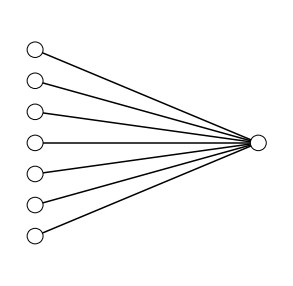

In [33]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [7, 1])

In [34]:
import keras

In [35]:
from keras.models import Sequential
from keras import layers

In [36]:
yelp_train[0]

'The food was barely lukewarm, so it must have been sitting waiting for the server to bring it out to us.'

In [37]:
yelp_cv_train[0]

<1x1714 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [38]:
sentence_vector = yelp_cv_train[0].toarray()[0]
print("Vector (row) is a list", len(sentence_vector), "numbers long:", sentence_vector)
for i, feature in enumerate(sentence_vector):
  if feature > 0:
    print("Column {:4} ({}): {}".format(i, feature, yelp_reverse[i]))

Vector (row) is a list 1714 numbers long: [0 0 0 ... 0 0 0]
Column  125 (1): barely
Column  145 (1): been
Column  201 (1): bring
Column  597 (1): food
Column  600 (1): for
Column  710 (1): have
Column  801 (2): it
Column  888 (1): lukewarm
Column  973 (1): must
Column 1042 (1): out
Column 1308 (1): server
Column 1345 (1): sitting
Column 1360 (1): so
Column 1494 (2): the
Column 1524 (2): to
Column 1587 (1): us
Column 1622 (1): waiting
Column 1634 (1): was


In [39]:
print(yelp_cv_train.shape)

(750, 1714)


In [40]:
print(yelp_cv_train.shape[1])

1714


In [41]:
# start a new model
simple_model = Sequential()
# 1714 input nodes
in_layer_size = yelp_cv_train.shape[1]
# add a layer that connects the input to a single output
# output's decision is based on a sigmoid function
simple_model.add(layers.Dense(1, input_dim=in_layer_size, activation='sigmoid'))

In [42]:
# tell the model how to optimize itself
simple_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [43]:
simple_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1715      
                                                                 
Total params: 1,715
Trainable params: 1,715
Non-trainable params: 0
_________________________________________________________________


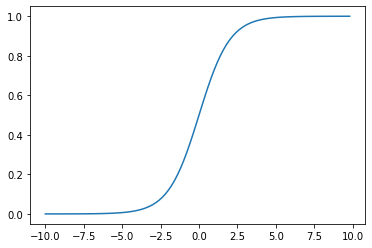

In [44]:
import math
import numpy as np
x = np.arange(-10., 10., 0.2)
plt.plot(x,[1/(1+math.exp(-item)) for item in x])
plt.show()

In [45]:
# let's go, train it
simple_model_history = simple_model.fit(
    yelp_cv_train, yelp_train_labels,
    epochs=100,
    verbose=False,
    validation_data=(yelp_cv_test, yelp_test_labels),
    batch_size=10
)

/usr2/faculty/hagstrom/.local/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 1), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


In [46]:
loss, accuracy = simple_model.evaluate(yelp_cv_train, yelp_train_labels, verbose=False)
print("Training accuracy: {:.4f}".format(accuracy))
loss, accuracy = simple_model.evaluate(yelp_cv_test, yelp_test_labels, verbose=False)
print("Testing accuracy: {:.4f}".format(accuracy))

Training accuracy: 0.9933
Testing accuracy: 0.8120


In [47]:
def plot_history(hist):
  metrics = ['accuracy', 'loss']
  histories = [(hist.history[m], hist.history["val_" + m]) for m in metrics]
  xlist = range(1, len(histories[0][0]) + 1)
  plt.figure(figsize=(12,5))
  for i, m in enumerate(metrics):
    plt.subplot(1, 2, i+1)
    plt.plot(xlist, histories[i][0], 'b', label="Training "+m)
    plt.plot(xlist, histories[i][1], 'r', label="Validation "+m)
    plt.title("Training and validation "+m)
    plt.legend()

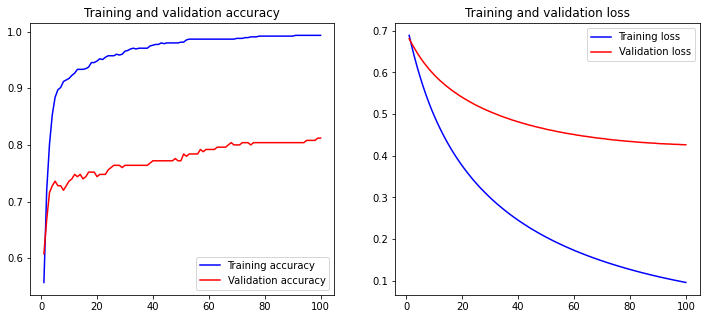

In [48]:
plot_history(simple_model_history)

In [49]:
weights = simple_model.get_weights()

In [50]:
weights

[array([[-0.6370847 ],
        [-0.5610547 ],
        [ 0.19202624],
        ...,
        [-0.38695565],
        [ 0.8428802 ],
        [-1.0853479 ]], dtype=float32),
 array([-0.00249515], dtype=float32)]

In [51]:
print("{}: {}".format(weights[0][1712], yelp_reverse[1712]))
print("{}: {}".format(weights[0][1713], yelp_reverse[1713]))
# yep, ok, that tracks

[0.8428802]: yummy
[-1.0853479]: zero


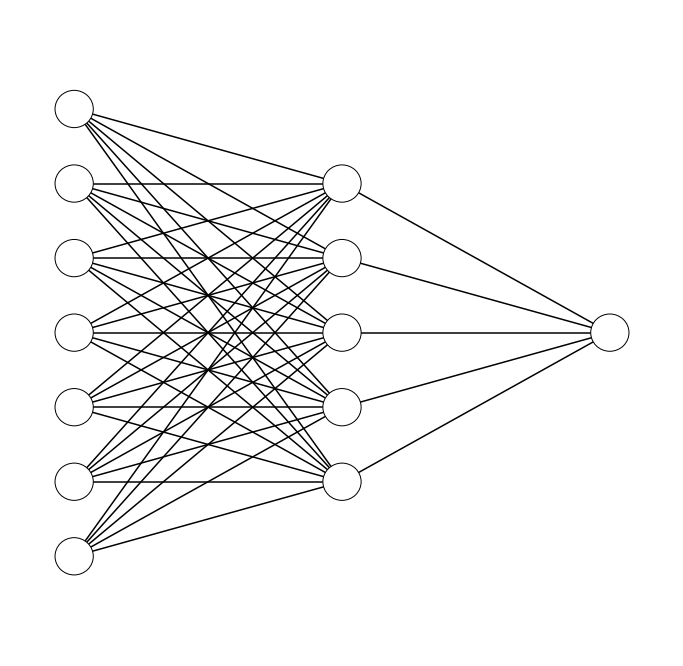

In [52]:
# picture of a more complex network with a lyear of hidden nodes
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [7, 5, 1])


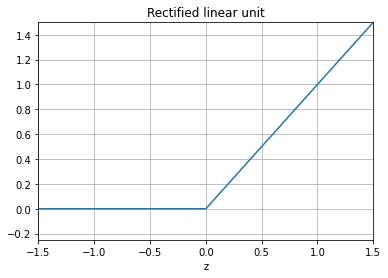

In [53]:
z = np.arange(-2, 2, .1)
zero = np.zeros(len(z))
y = np.max([zero, z], axis=0)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, y)
ax.set_ylim([-0.25, 1.5])
ax.set_xlim([-1.5, 1.5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('Rectified linear unit')
plt.show()

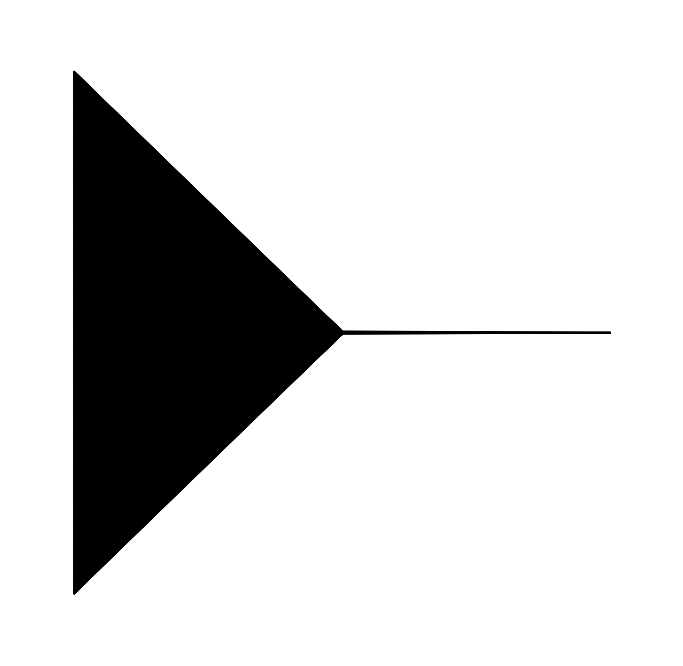

In [54]:
# picture of a more complex network with a lyear of hidden nodes
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [1714, 10, 1])

In [55]:
# define a new sequentially-organized model
modelb = Sequential()
# connect the input layer densely to an array of 10 hidden nodes
in_layer_size = yelp_cv_train.shape[1]
modelb.add(layers.Dense(10, input_dim=in_layer_size, activation='relu'))
# connect the hidden nodes densely to an output node that decides 1/0
modelb.add(layers.Dense(1, activation='sigmoid'))
# use binary_crossentropy for loss, adam for optimizer, accuracy for metric
modelb.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
modelb.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                17150     
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 17,161
Trainable params: 17,161
Non-trainable params: 0
_________________________________________________________________


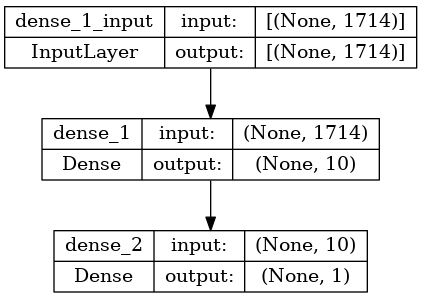

In [57]:
# Keras' built in network visualizer.
keras.utils.plot_model(modelb, show_shapes=True)
# boxes in the diagram are basically the spaces between layers

In [58]:
# train the model that has the hidden nodes
modelb_history = modelb.fit(
    yelp_cv_train, yelp_train_labels,
    epochs=100,
    verbose=False,
    validation_data=(yelp_cv_test, yelp_test_labels),
    batch_size=10
)

/usr2/faculty/hagstrom/.local/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/dense_1/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/dense_1/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/dense_1/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


In [59]:
loss, accuracy = modelb.evaluate(yelp_cv_train, yelp_train_labels, verbose=False)
print("Training accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelb.evaluate(yelp_cv_test, yelp_test_labels, verbose=False)
print("Testing accuracy: {:.4f}".format(accuracy))

Training accuracy: 1.0000
Testing accuracy: 0.7920


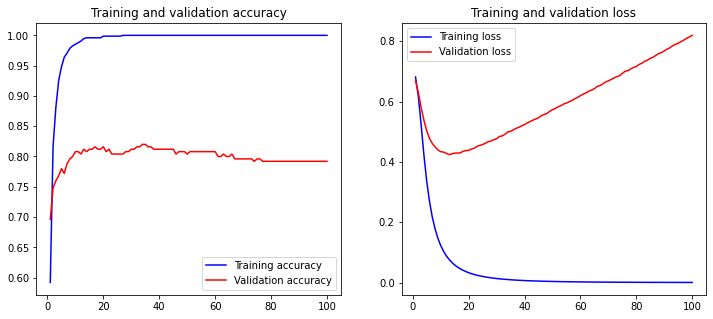

In [60]:
plot_history(modelb_history)

In [61]:
# overfit

/usr2/faculty/hagstrom/.local/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/dense_3/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/dense_3/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/dense_3/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Training accuracy: 0.9973
Testing accuracy: 0.7960


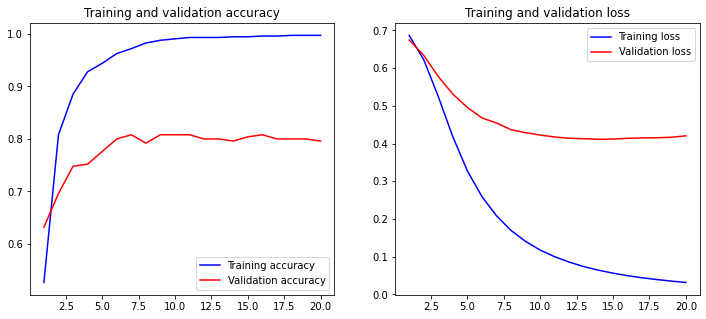

In [62]:
# define a new sequentially-organized model
modelc = Sequential()
# connect the input layer densely to an array of 10 hidden nodes
in_layer_size = yelp_cv_train.shape[1]
modelc.add(layers.Dense(10, input_dim=in_layer_size, activation='relu'))
# connect the hidden nodes densely to an output node that decides 1/0
modelc.add(layers.Dense(1, activation='sigmoid'))
# use binary_crossentropy for loss, adam for optimizer, accuracy for metric
modelc.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train the model that has the hidden nodes
modelc_history = modelc.fit(
    yelp_cv_train, yelp_train_labels,
    epochs=20,  #### THIS IS THE LINE THAT WAS CHANGED
    verbose=False,
    validation_data=(yelp_cv_test, yelp_test_labels),
    batch_size=10
)
loss, accuracy = modelc.evaluate(yelp_cv_train, yelp_train_labels, verbose=False)
print("Training accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelc.evaluate(yelp_cv_test, yelp_test_labels, verbose=False)
print("Testing accuracy: {:.4f}".format(accuracy))
plot_history(modelc_history)

In [63]:
from keras.preprocessing.text import Tokenizer

In [64]:
tokenizer = Tokenizer()

In [65]:
tokenizer.fit_on_texts(yelp_train)

In [66]:
seq_train = tokenizer.texts_to_sequences(yelp_train)
seq_test = tokenizer.texts_to_sequences(yelp_test)

In [67]:
print(yelp_train[3])
print(seq_train[3])

The fries were not hot, and neither was my burger.
[1, 233, 24, 12, 209, 2, 741, 3, 23, 125]


In [68]:
from keras.utils import pad_sequences

In [69]:
longest_sentence = 100
pseq_train = pad_sequences(seq_train, padding='post', maxlen=longest_sentence)
pseq_test = pad_sequences(seq_test, padding='post', maxlen=longest_sentence)

In [70]:
print(pseq_train[3])

[  1 233  24  12 209   2 741   3  23 125   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [71]:
vocab_size = len(tokenizer.word_index) + 1 # 0 is for padding
print("Vocabulary size: ", vocab_size)
# 50 dimensional space is our target
embedding_dim = 50

Vocabulary size:  1747


In [72]:
modele = Sequential()
modele.add(layers.Embedding(
    input_dim = vocab_size,
    output_dim = embedding_dim,
    input_length = longest_sentence
))

In [73]:
modele.add(layers.Flatten())
modele.add(layers.Dense(10, activation='relu'))
modele.add(layers.Dense(1, activation='sigmoid'))
modele.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [74]:
modele.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           87350     
                                                                 
 flatten (Flatten)           (None, 5000)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                50010     
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 137,371
Trainable params: 137,371
Non-trainable params: 0
_________________________________________________________________


In [75]:
modele_history = modele.fit(
    pseq_train, yelp_train_labels,
    epochs = 20,
    verbose = False,
    validation_data=(pseq_test, yelp_test_labels),
    batch_size=10
)

Training accuracy: 0.5067
Testing accuracy: 0.4800


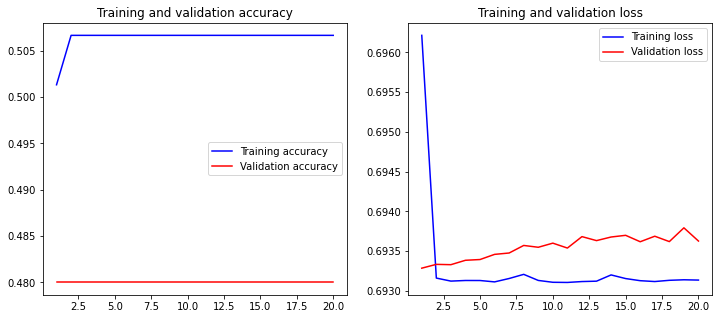

In [76]:
loss, accuracy = modele.evaluate(pseq_train, yelp_train_labels, verbose=False)
print("Training accuracy: {:.4f}".format(accuracy))
loss, accuracy = modele.evaluate(pseq_test, yelp_test_labels, verbose=False)
print("Testing accuracy: {:.4f}".format(accuracy))
plot_history(modele_history)

In [77]:
# glove

In [78]:
lines_to_print = 5
with open('/projectnb/lx796/materials/glove.6B.50d.txt') as f:
  while lines_to_print > 0:
    # ask f (the file) for a line, then strip off the end of line characters
    # when we print it out, an end of line character will be added anyway
    print(f.readline().strip())
    print('--')
    lines_to_print -= 1

the 0.418 0.24968 -0.41242 0.1217 0.34527 -0.044457 -0.49688 -0.17862 -0.00066023 -0.6566 0.27843 -0.14767 -0.55677 0.14658 -0.0095095 0.011658 0.10204 -0.12792 -0.8443 -0.12181 -0.016801 -0.33279 -0.1552 -0.23131 -0.19181 -1.8823 -0.76746 0.099051 -0.42125 -0.19526 4.0071 -0.18594 -0.52287 -0.31681 0.00059213 0.0074449 0.17778 -0.15897 0.012041 -0.054223 -0.29871 -0.15749 -0.34758 -0.045637 -0.44251 0.18785 0.0027849 -0.18411 -0.11514 -0.78581
--
, 0.013441 0.23682 -0.16899 0.40951 0.63812 0.47709 -0.42852 -0.55641 -0.364 -0.23938 0.13001 -0.063734 -0.39575 -0.48162 0.23291 0.090201 -0.13324 0.078639 -0.41634 -0.15428 0.10068 0.48891 0.31226 -0.1252 -0.037512 -1.5179 0.12612 -0.02442 -0.042961 -0.28351 3.5416 -0.11956 -0.014533 -0.1499 0.21864 -0.33412 -0.13872 0.31806 0.70358 0.44858 -0.080262 0.63003 0.32111 -0.46765 0.22786 0.36034 -0.37818 -0.56657 0.044691 0.30392
--
. 0.15164 0.30177 -0.16763 0.17684 0.31719 0.33973 -0.43478 -0.31086 -0.44999 -0.29486 0.16608 0.11963 -0.41328 -0

In [79]:
# for working with matrices
import numpy as np

In [80]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [81]:
emb_dim = 50 # this has to match the GloVe file
emb_matrix = create_embedding_matrix(
    '/projectnb/lx796/materials/glove.6B.50d.txt',
    tokenizer.word_index, emb_dim
)

In [82]:
nonzero_elements = np.count_nonzero(np.count_nonzero(emb_matrix, axis=1))
nonzero_elements / vocab_size

0.9507727532913566

In [83]:
modelf = Sequential()
modelf.add(layers.Embedding(vocab_size, emb_dim, 
                           weights=[emb_matrix], 
                           input_length=longest_sentence, 
                           trainable=False))
modelf.add(layers.GlobalMaxPool1D())
modelf.add(layers.Dense(10, activation='relu'))
modelf.add(layers.Dense(1, activation='sigmoid'))
modelf.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
modelf.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 50)           87350     
                                                                 
 global_max_pooling1d (Globa  (None, 50)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 87,871
Trainable params: 521
Non-trainable params: 87,350
_________________________________________________________________


Training accuracy: 0.7587
Testing accuracy: 0.6800


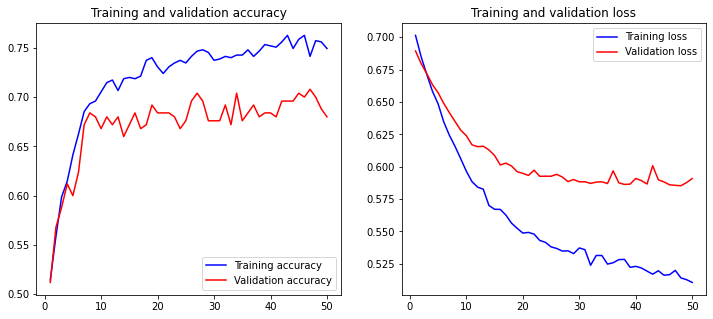

In [84]:
modelf_history = modelf.fit(pseq_train, yelp_train_labels,
                    epochs=50,
                    verbose=False,
                    validation_data=(pseq_test, yelp_test_labels),
                    batch_size=10)
loss, accuracy = modelf.evaluate(pseq_train, yelp_train_labels, verbose=False)
print("Training accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelf.evaluate(pseq_test, yelp_test_labels, verbose=False)
print("Testing accuracy: {:.4f}".format(accuracy))
plot_history(modelf_history)

Training accuracy: 1.0000
Testing accuracy: 0.7920


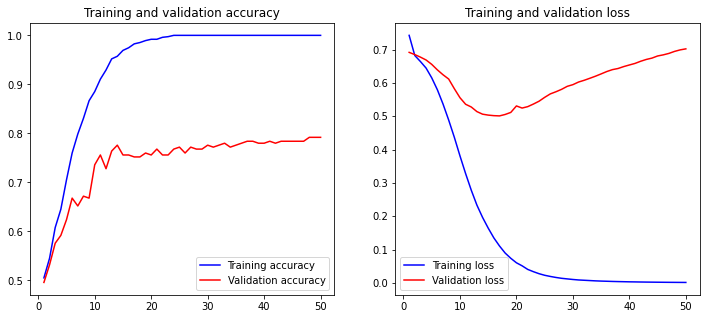

In [85]:
modelg = Sequential()
modelg.add(layers.Embedding(vocab_size, emb_dim, 
                           weights=[emb_matrix], 
                           input_length=longest_sentence, 
                           trainable=True))
modelg.add(layers.GlobalMaxPool1D())
modelg.add(layers.Dense(10, activation='relu'))
modelg.add(layers.Dense(1, activation='sigmoid'))
modelg.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
modelg_history = modelg.fit(pseq_train, yelp_train_labels,
                    epochs=50,
                    verbose=False,
                    validation_data=(pseq_test, yelp_test_labels),
                    batch_size=10)
loss, accuracy = modelg.evaluate(pseq_train, yelp_train_labels, verbose=False)
print("Training accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelg.evaluate(pseq_test, yelp_test_labels, verbose=False)
print("Testing accuracy: {:.4f}".format(accuracy))
plot_history(modelg_history)

Training accuracy: 0.9907
Testing accuracy: 0.7640


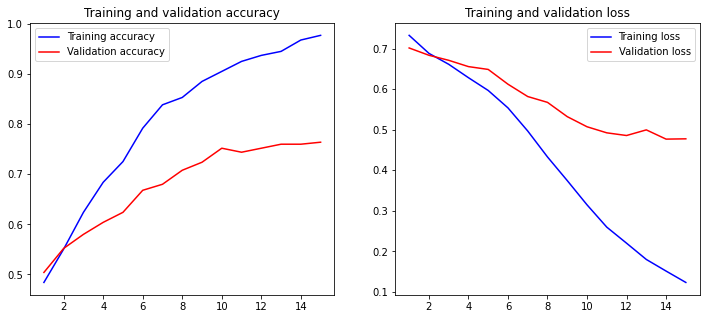

In [86]:
modelh = Sequential()
modelh.add(layers.Embedding(vocab_size, emb_dim, 
                           weights=[emb_matrix], 
                           input_length=longest_sentence, 
                           trainable=True))
modelh.add(layers.GlobalMaxPool1D())
modelh.add(layers.Dense(10, activation='relu'))
modelh.add(layers.Dense(1, activation='sigmoid'))
modelh.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
modelh_history = modelh.fit(pseq_train, yelp_train_labels,
                    epochs=15,
                    verbose=False,
                    validation_data=(pseq_test, yelp_test_labels),
                    batch_size=10)
loss, accuracy = modelh.evaluate(pseq_train, yelp_train_labels, verbose=False)
print("Training accuracy: {:.4f}".format(accuracy))
loss, accuracy = modelh.evaluate(pseq_test, yelp_test_labels, verbose=False)
print("Testing accuracy: {:.4f}".format(accuracy))
plot_history(modelh_history)